In [1]:
import numpy as np
import pandas as pd
import pymc3 as pm
import requests


C:\Users\DESUSAI\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
df = pd.read_csv("C:/Users/DESUSAI/Desktop/New folder/Fifa2018.csv",sep=';')
rslt = pd.read_csv("C:/Users/DESUSAI/Desktop/New folder/results.csv",sep=',')
rslt

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False


In [3]:
df

,Group,Team
0,A,Russia
1,A,Uruguay
2,A,Egypt
3,A,Saudi Arabia
4,B,Spain
5,B,Portugal
6,B,Iran
7,B,Morocco
8,C,France
9,C,Denmark


In [4]:
rslt = rslt.loc[:,'date':'away_score']
rslt

,date,home_team,away_team,home_score,away_score
0,1872-11-30,Scotland,England,0,0
1,1873-03-08,England,Scotland,4,2
2,1874-03-07,Scotland,England,2,1
3,1875-03-06,England,Scotland,2,2
4,1876-03-04,Scotland,England,3,0
5,1876-03-25,Scotland,Wales,4,0
6,1877-03-03,England,Scotland,1,3
7,1877-03-05,Wales,Scotland,0,2
8,1878-03-02,Scotland,England,7,2
9,1878-03-23,Scotland,Wales,9,0


In [5]:
rslt

,date,home_team,away_team,home_score,away_score
0,1872-11-30,Scotland,England,0,0
1,1873-03-08,England,Scotland,4,2
2,1874-03-07,Scotland,England,2,1
3,1875-03-06,England,Scotland,2,2
4,1876-03-04,Scotland,England,3,0
5,1876-03-25,Scotland,Wales,4,0
6,1877-03-03,England,Scotland,1,3
7,1877-03-05,Wales,Scotland,0,2
8,1878-03-02,Scotland,England,7,2
9,1878-03-23,Scotland,Wales,9,0


In [6]:
def update(x,y):
    for j in range(0,len(rslt.home_team)):
        if (rslt.home_team[j]==y):
            rslt.at[j,'HomeGroup']=x
        if (rslt.away_team[j]==y):
            rslt.at[j,'AwayGroup']=x
            
    

for i in range(0,len(df.Group)):
    update(df.Group[i],df.Team[i])
    
    

In [7]:
i=0
j=0
k=0
def updatestats(TeamName):
    goalscored=0
    goalconceded=0
    noofmatch=0
    for j in range(0,len(rslt.home_team)):
        if (rslt.home_team[j]==TeamName):
            goalscored+=rslt.home_score[j]
            goalconceded+=rslt.away_score[j]
            noofmatch+=1 
        if (rslt.away_team[j]==TeamName):
            goalscored+=rslt.away_score[j]
            goalconceded+=rslt.home_score[j]
            noofmatch+=1   
    
    for K in range(0,len(df.Team)):
        if (df.Team[K]==TeamName):
            df.at[K,'goal_scored']=goalscored        
            df.at[K,'goal_conceded']=goalconceded  
            df.at[K,'No_of_matches']=noofmatch


for i in range(0,len(df.Team)):
      updatestats(df.Team[i])
    

In [8]:
df

,Group,Team,goal_scored,goal_conceded,No_of_matches
0,A,Russia,1154.0,649.0,674.0
1,A,Uruguay,1361.0,1082.0,864.0
2,A,Egypt,992.0,629.0,616.0
3,A,Saudi Arabia,939.0,640.0,594.0
4,B,Spain,1336.0,610.0,674.0
5,B,Portugal,997.0,699.0,597.0
6,B,Iran,881.0,391.0,481.0
7,B,Morocco,708.0,430.0,508.0
8,C,France,1445.0,1083.0,817.0
9,C,Denmark,1380.0,1080.0,778.0


In [9]:
df['difference'] = df['goal_scored']-df['goal_conceded']


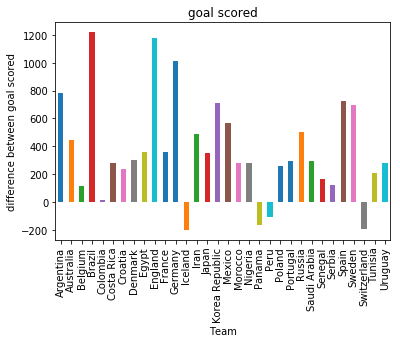

In [10]:
(df.groupby('Team')['difference']
      .mean()
      .plot(kind='bar', title='goal scored', yerr=df.groupby('Team')['difference'].std())
      .set_ylabel('difference between goal scored'));


In [11]:
i=0
K=0
j=0
global Team1
global Team2
Team1 = pd.DataFrame(columns=['Group'])
for K in range(0,len(df.Group)-1):
    i=K+1
    while ((df.Group[K])==(df.Group[i])):
        model = pm.Model();
        with model:
            GoalScoredTeam1 = pm.Poisson("GoalScoredTeam1",df.goal_scored[K]/df.No_of_matches[K])
            GoalConcededTeam1 = pm.Poisson("GoalConcededTeam1",df.goal_conceded[K]/df.No_of_matches[K])
            GoalScoredTeam2 = pm.Poisson("GoalScoredTeam2",df.goal_scored[i]/df.No_of_matches[i])
            GoalConcededTeam2 = pm.Poisson("GoalConcededTeam2",df.goal_conceded[i]/df.No_of_matches[i])
            Team1Win = pm.Poisson("Team1Win",GoalScoredTeam1+GoalConcededTeam2)
            Team2Win = pm.Poisson("Team2Win",GoalScoredTeam2+GoalConcededTeam1)
            trace= pm.sample(100000,tune=50000,random_seed=123,progressbar=True)
            Team1.at[j,'Group']=df.Group[K]
            Team1.at[j,'Home_Team']=df.Team[K]
            Team1.at[j,'Away_Team']=df.Team[i]                                  
            Team1.at[j,'HomeWon']=trace['Team1Win'].mean()
            Team1.at[j,'AwayWon']=trace['Team2Win'].mean()
            Team1.at[j,'Goal_scored_Home']=trace['GoalScoredTeam1'].mean()
            Team1.at[j,'Goal_scored_Away']=trace['GoalScoredTeam2'].mean()
            i+=1
            j+=1            
            if(i==len(df.Group)):
                i=k+1
                
            



Assigned Metropolis to GoalScoredTeam1
Assigned Metropolis to GoalConcededTeam1
Assigned Metropolis to GoalScoredTeam2
Assigned Metropolis to GoalConcededTeam2
Assigned Metropolis to Team1Win
Assigned Metropolis to Team2Win
100%|█████████████████████████████████| 150000/150000 [06:13<00:00, 401.41it/s]
Assigned Metropolis to GoalScoredTeam1
Assigned Metropolis to GoalConcededTeam1
Assigned Metropolis to GoalScoredTeam2
Assigned Metropolis to GoalConcededTeam2
Assigned Metropolis to Team1Win
Assigned Metropolis to Team2Win
100%|█████████████████████████████████| 150000/150000 [06:03<00:00, 412.80it/s]
Assigned Metropolis to GoalScoredTeam1
Assigned Metropolis to GoalConcededTeam1
Assigned Metropolis to GoalScoredTeam2
Assigned Metropolis to GoalConcededTeam2
Assigned Metropolis to Team1Win
Assigned Metropolis to Team2Win
100%|█████████████████████████████████| 150000/150000 [06:02<00:00, 413.99it/s]
Assigned Metropolis to GoalScoredTeam1
Assigned Metropolis to GoalConcededTeam1
Assigned

In [12]:
Team1

,Group,Home_Team,Away_Team,HomeWon,AwayWon,Goal_scored_Home,Goal_scored_Away
0,A,Russia,Uruguay,2.98112,2.53020,1.72448,1.57183
1,A,Russia,Egypt,2.73996,2.60795,1.72165,1.62087
2,A,Russia,Saudi Arabia,2.82885,2.53437,1.70703,1.58163
3,A,Uruguay,Egypt,2.57322,2.94198,1.55876,1.63501
4,A,Uruguay,Saudi Arabia,2.61614,2.82885,1.55440,1.59849
5,A,Egypt,Saudi Arabia,2.66020,2.59805,1.59617,1.57414
6,B,Spain,Portugal,3.14814,2.55688,1.97611,1.66448
7,B,Spain,Iran,2.80980,2.71101,1.99847,1.80359
8,B,Spain,Morocco,2.84720,2.30509,1.99286,1.39769
9,B,Portugal,Iran,2.48600,2.98004,1.65336,1.83470


In [13]:
GroupR = pd.DataFrame(df.Group,columns=['Group'])
GroupR['Team'] = df['Team']
i=0
j=0
k=0
for i in range(0,len(GroupR)):    
    hwon=0      
    hgoalScored=0       
    AgoalScored=0            
    while(j<=len(Team1)-1) and (GroupR.Team[i] == Team1.Home_Team[j]):       
        hgoalScored+=Team1.Goal_scored_Home[j]
        GroupR.at[i,'GoalScored'] =hgoalScored
        AgoalScored+=Team1.Goal_scored_Away[j]
        GroupR.at[i,'GoalConceded']=AgoalScored 
        if (Team1.HomeWon[j]>Team1.AwayWon[j]):
            hwon +=3 
            GroupR.at[i,'Points'] = hwon                       
        j+=1        
    for k in range(0,len(Team1)):        
        if (GroupR.Team[i]==Team1.Away_Team[k]):
            
            hgoalScored+=Team1.Goal_scored_Away[k]        
            AgoalScored+=Team1.Goal_scored_Home[k]
            GroupR.at[i,'GoalConceded']=hgoalScored 
            GroupR.at[i,'GoalScored'] =AgoalScored
            if (Team1.HomeWon[k]<Team1.AwayWon[k]):
                hwon +=3 
                GroupR.at[i,'Points'] = hwon              
                
                
                
 
    GroupR.fillna(0) 

In [14]:
GroupR = GroupR.fillna(0)

In [15]:
GroupR

,Group,Team,GoalScored,GoalConceded,Points
0,A,Russia,5.15316,4.77433,9.0
1,A,Uruguay,4.95798,4.68499,0.0
2,A,Egypt,4.85455,4.85205,6.0
3,A,Saudi Arabia,4.85760,4.75426,3.0
4,B,Spain,5.96744,4.86576,9.0
5,B,Portugal,5.21338,4.97984,0.0
6,B,Iran,5.05384,5.44079,6.0
7,B,Morocco,5.45736,4.20227,3.0
8,C,France,5.32624,5.01951,6.0
9,C,Denmark,5.01094,5.31623,3.0


In [16]:
QualifiedperQtr=GroupR.sort_values(['Group','Points','GoalScored'],ascending=False)
QualifiedperQtr=QualifiedperQtr.reset_index(drop=True)
QualifiedperQtr


,Group,Team,GoalScored,GoalConceded,Points
0,H,Japan,4.19966,5.29139,9.0
1,H,Senegal,4.65655,3.90396,6.0
2,H,Poland,4.25839,5.05714,3.0
3,H,Colombia,3.61942,4.75731,0.0
4,G,England,4.30422,6.58596,9.0
5,G,Tunisia,5.08043,4.30640,6.0
6,G,Belgium,5.19510,4.76862,3.0
7,G,Panama,5.39549,3.46130,0.0
8,F,Germany,5.50900,6.66322,9.0
9,F,Korea Republic,5.88029,5.32931,6.0


In [17]:
QualifiedperQtr=QualifiedperQtr.groupby('Group').head(2)
QualifiedperQtr=QualifiedperQtr.sort_values(['Group','Points'],ascending=False)
QualifiedperQtr=QualifiedperQtr.reset_index(drop=True)
QualifiedperQtr


,Group,Team,GoalScored,GoalConceded,Points
0,H,Japan,4.19966,5.29139,9.0
1,H,Senegal,4.65655,3.90396,6.0
2,G,England,4.30422,6.58596,9.0
3,G,Tunisia,5.08043,4.30640,6.0
4,F,Germany,5.50900,6.66322,9.0
5,F,Korea Republic,5.88029,5.32931,6.0
6,E,Brazil,6.54136,4.59884,9.0
7,E,Costa Rica,5.11172,4.96471,6.0
8,D,Croatia,5.26858,4.56147,9.0
9,D,Argentina,4.46499,5.60614,6.0


Assigned Metropolis to Team1GoalScored
Assigned Metropolis to Team1GoalConceded
Assigned Metropolis to Team2GoalScored
Assigned Metropolis to Team2GoalConceded
Assigned Metropolis to PerQtr1Win
Assigned Metropolis to PerQtr2Win
100%|█████████████████████████████████| 150000/150000 [05:59<00:00, 417.40it/s]
Assigned Metropolis to Team1GoalScored
Assigned Metropolis to Team1GoalConceded
Assigned Metropolis to Team2GoalScored
Assigned Metropolis to Team2GoalConceded
Assigned Metropolis to PerQtr1Win
Assigned Metropolis to PerQtr2Win
100%|█████████████████████████████████| 150000/150000 [06:01<00:00, 414.74it/s]
Assigned Metropolis to Team1GoalScored
Assigned Metropolis to Team1GoalConceded
Assigned Metropolis to Team2GoalScored
Assigned Metropolis to Team2GoalConceded
Assigned Metropolis to PerQtr1Win
Assigned Metropolis to PerQtr2Win
100%|█████████████████████████████████| 150000/150000 [06:02<00:00, 414.21it/s]
Assigned Metropolis to Team1GoalScored
Assigned Metropolis to Team1GoalConce

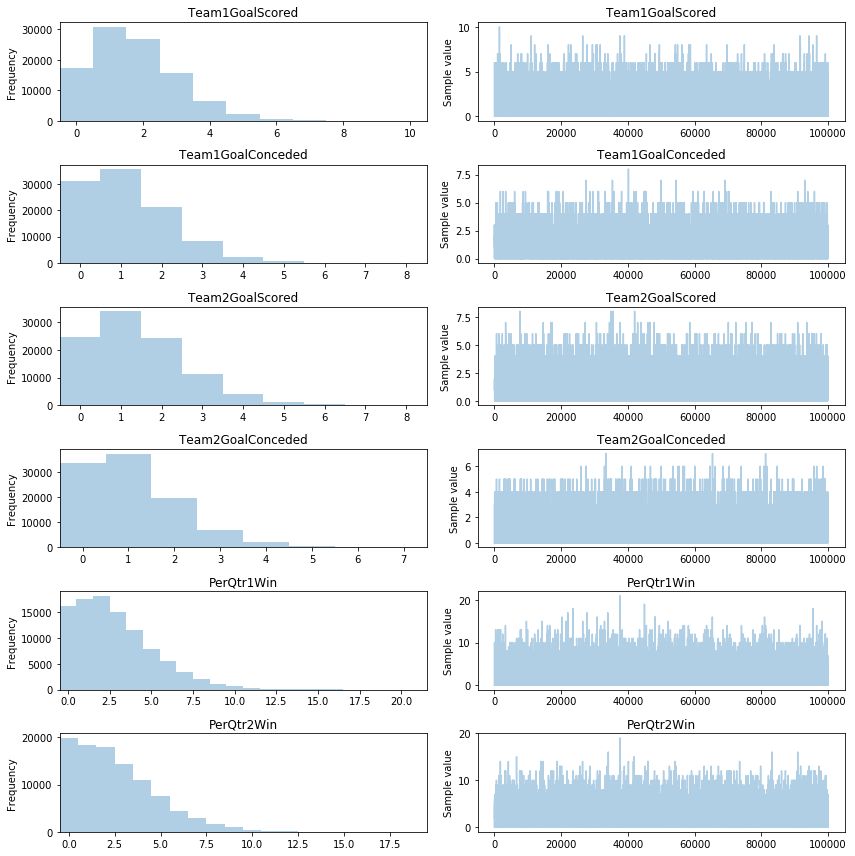

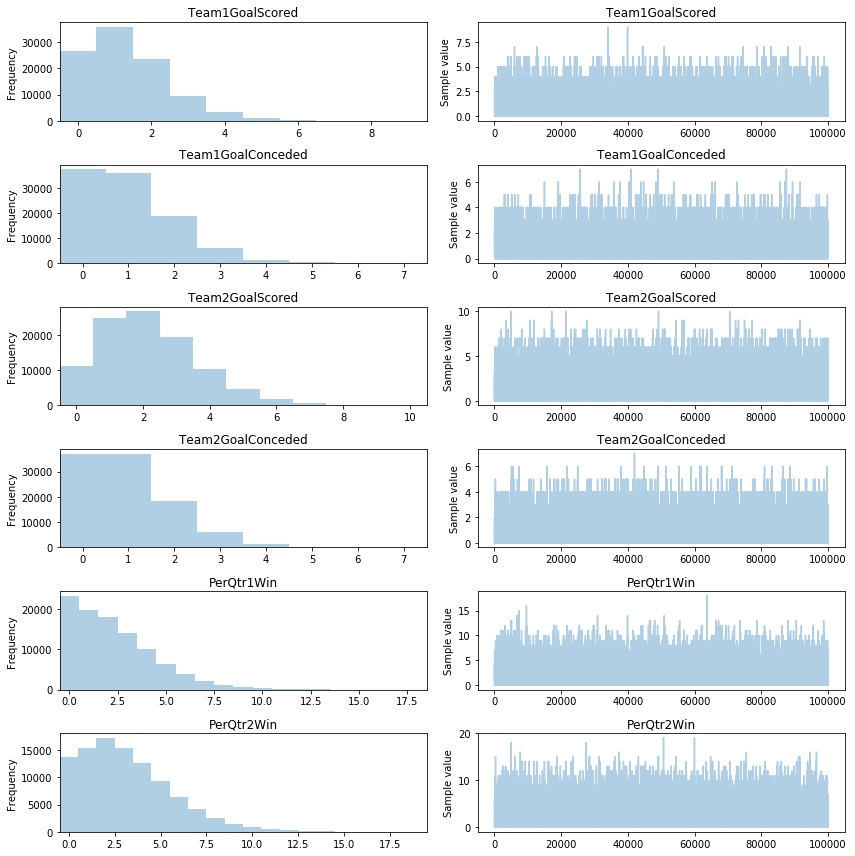

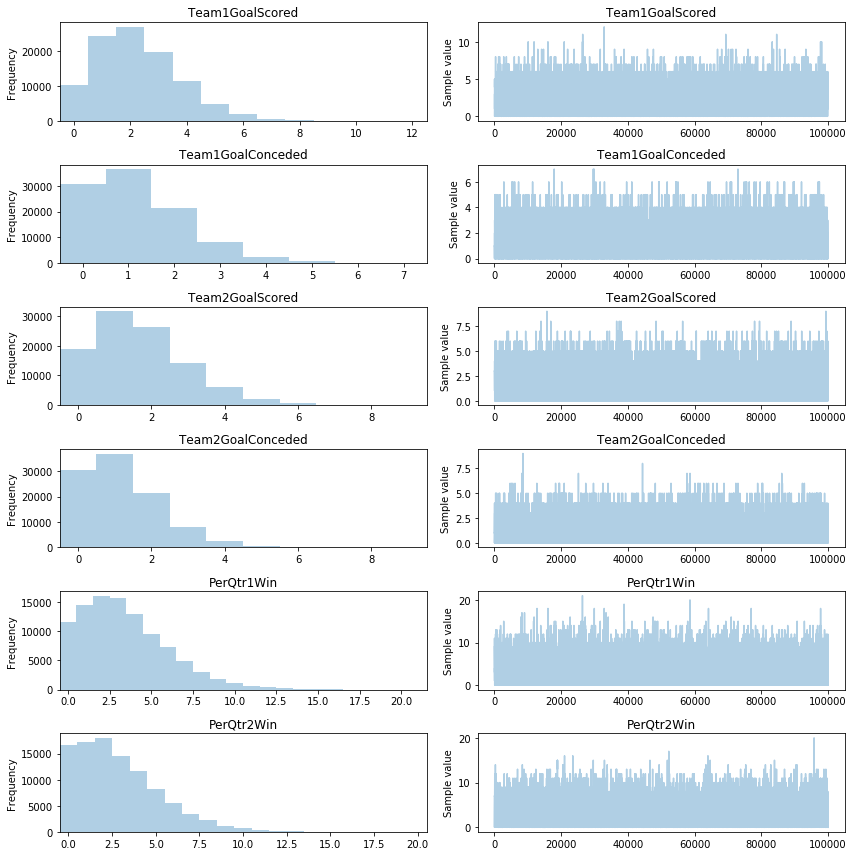

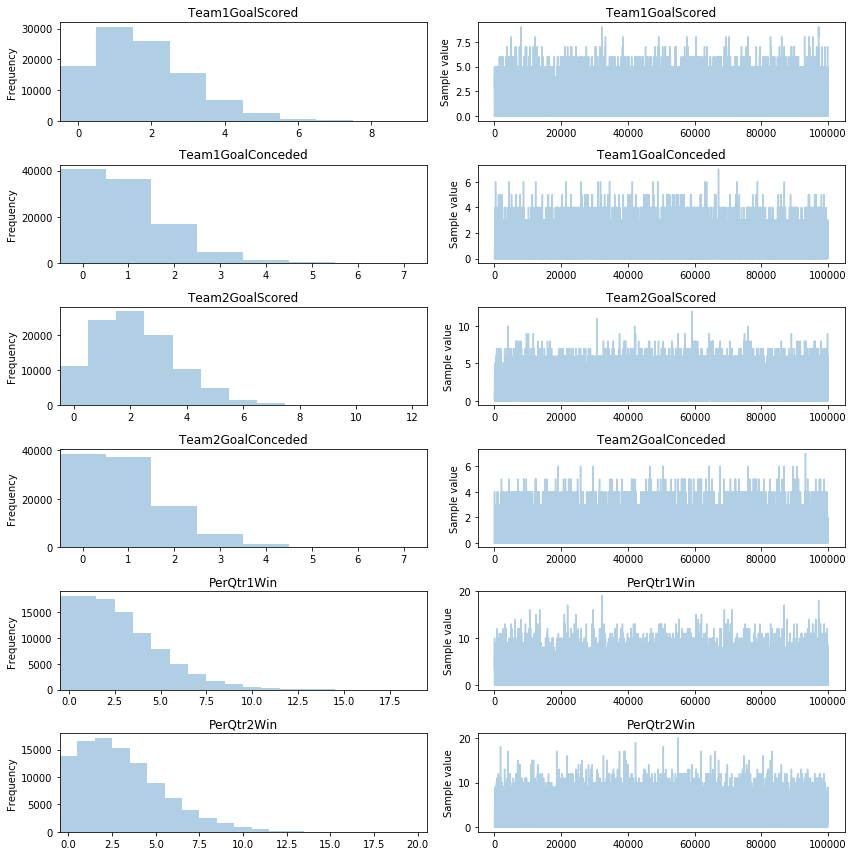

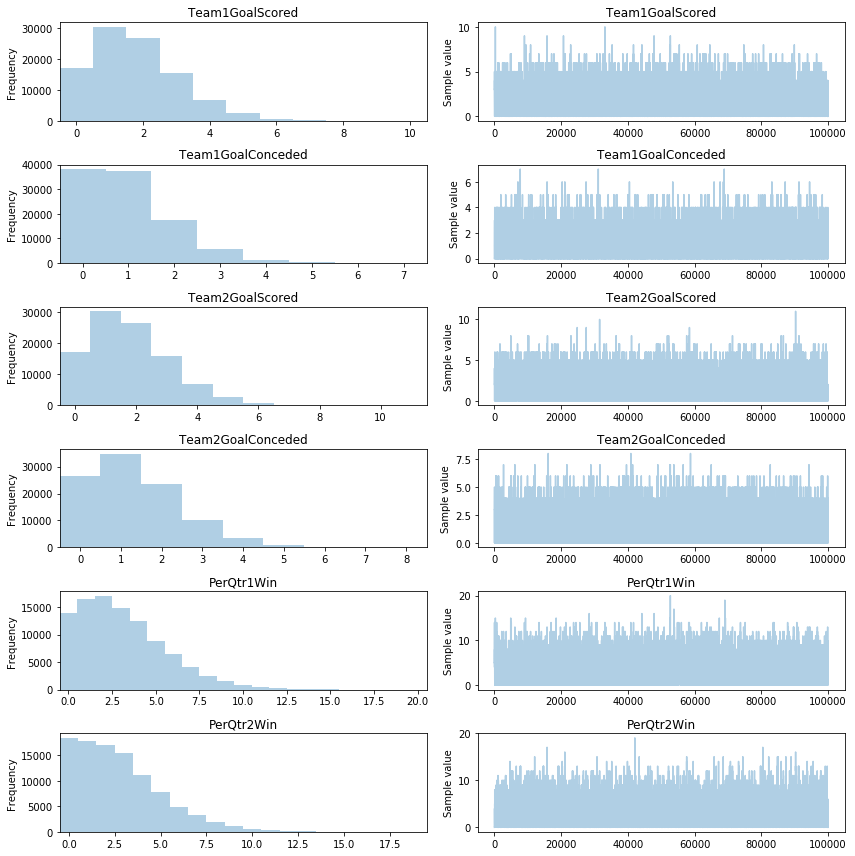

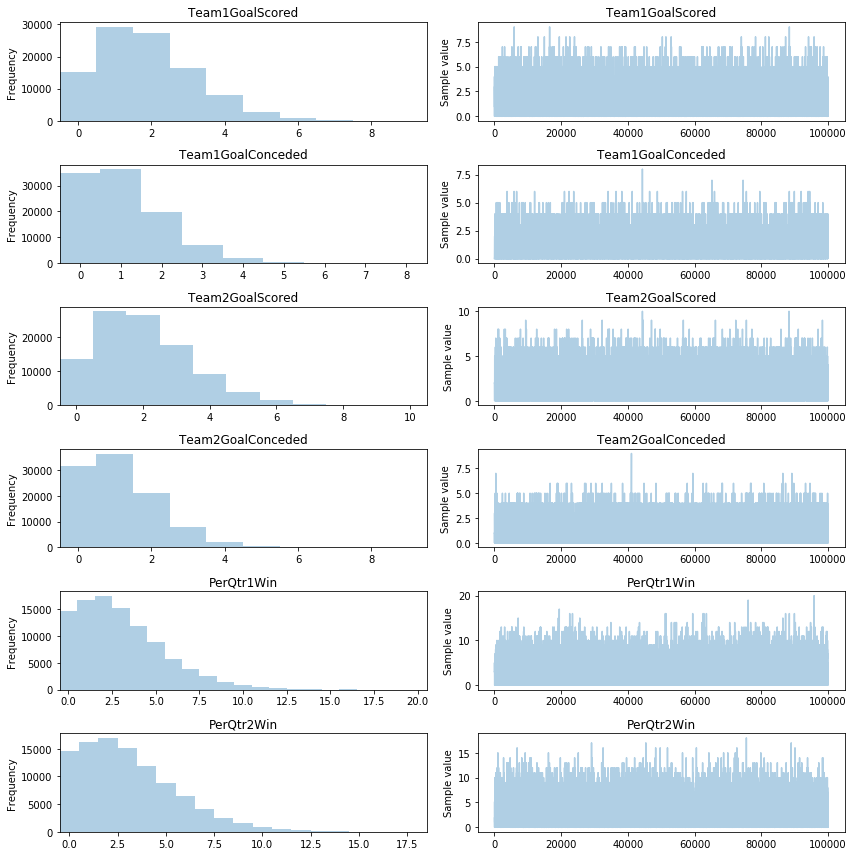

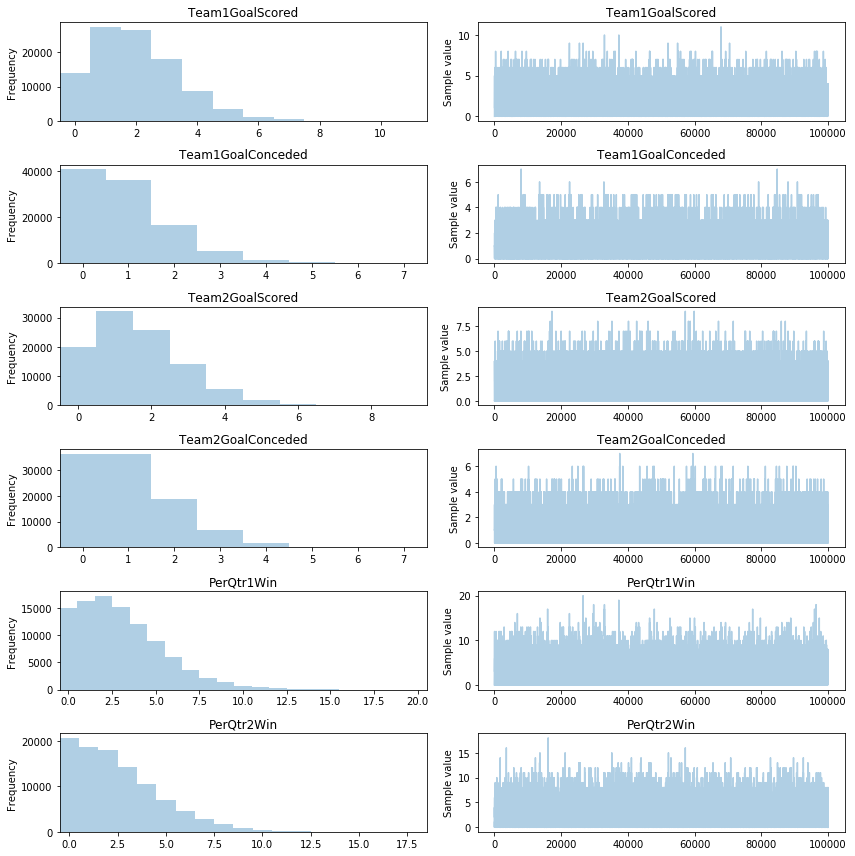

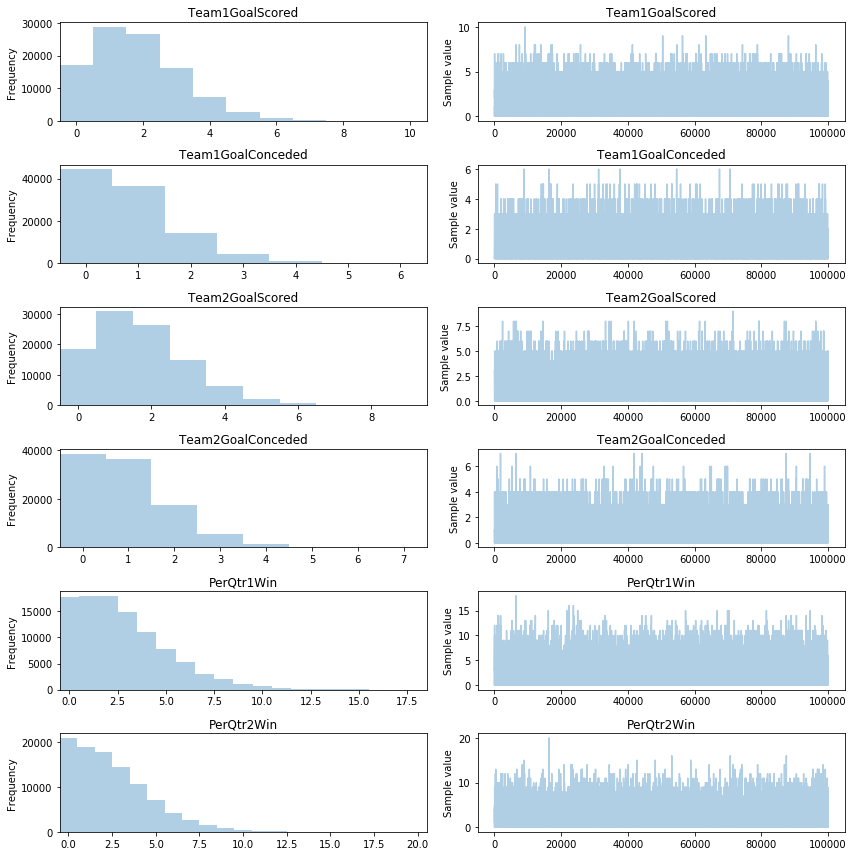

In [38]:
PQQtr = pd.DataFrame(columns=['Team'])
i=0
j=0
for i in range(0,len(QualifiedperQtr)):
    for j in range(0,len(df)):  
        if (QualifiedperQtr.Team[i]==df.Team[j]):            
            PQQtr.at[i,'Group']=df.Group[j]
            PQQtr.at[i,'Team']=df.Team[j]
            PQQtr.at[i,'GoalScored']=df.goal_scored[j]
            PQQtr.at[i,'GoalConceded']=df.goal_conceded[j]
            PQQtr.at[i,'No_of_matches']=df.No_of_matches[j]
PQQtr=PQQtr.sort_values(['Group'],ascending=False)
PQQtr=PQQtr.reset_index(drop=True)
QQtr            
i=0
j=0            
k=0
PreQtrR = pd.DataFrame(columns=['Home_Team'])
while (i <=len(QualifiedperQtr)-2):
    j=0    
    if (i % 2 == 0):       
        j=i+3        
    if (i % 2 != 0):
        j=i+1   
    #for k in range(0,8):        
    PreQtr = pm.Model();
    with PreQtr:
        Team1GoalScored = pm.Poisson('Team1GoalScored',PQQtr.GoalScored[i]/PQQtr.No_of_matches[i])
        Team1GoalConceded = pm.Poisson('Team1GoalConceded',PQQtr.GoalConceded[i]/PQQtr.No_of_matches[i])
        Team2GoalScored = pm.Poisson('Team2GoalScored',PQQtr.GoalScored[j]/PQQtr.No_of_matches[j])
        Team2GoalConceded = pm.Poisson('Team2GoalConceded',PQQtr.GoalConceded[j]/PQQtr.No_of_matches[j])
        PerQtr1Win = pm.Poisson('PerQtr1Win',Team1GoalScored+Team2GoalConceded)
        PerQtr2Win = pm.Poisson('PerQtr2Win',Team2GoalScored+Team1GoalConceded)
        trace2= pm.sample(100000,tune=50000,random_seed=123,progressbar=True)     
        k+=1        
        PreQtrR.at[k,'Home_Team']=PQQtr.Team[i]
        PreQtrR.at[k,'Away_Team']=PQQtr.Team[j]                                  
        PreQtrR.at[k,'HomeWon']=trace2['PerQtr1Win'].mean()
        PreQtrR.at[k,'AwayWon']=trace2['PerQtr2Win'].mean()
        PreQtrR.at[k,'Goal_scored_Home']=trace2['Team1GoalScored'].mean()
        PreQtrR.at[k,'Goal_scored_Away']=trace2['Team2GoalScored'].mean()        
        pm.traceplot(trace2)
    if (i % 2 != 0):
        i=i+3      
    else:
        i=i+1
    
       
    
    


In [39]:
PreQtrR

,Home_Team,Away_Team,HomeWon,AwayWon,Goal_scored_Home,Goal_scored_Away
1,Japan,Tunisia,2.85124,2.57896,1.74865,1.40966
2,Senegal,England,2.30298,3.14877,1.30541,2.17907
3,Germany,Costa Rica,3.41337,2.85372,2.24498,1.66414
4,Korea Republic,Brazil,2.71027,3.08514,1.74540,2.19248
5,Croatia,France,3.10201,2.72253,1.76157,1.77397
6,Argentina,Australia,3.02017,3.08383,1.85852,2.01099
7,Spain,Egypt,3.01176,2.53284,1.97179,1.61484
8,Iran,Russia,2.73907,2.50380,1.80911,1.70115


In [40]:
QQtr = pd.DataFrame(columns=['Team'])


In [41]:
for i in range(1,len(PreQtrR)+1):
    if (PreQtrR.HomeWon[i]>PreQtrR.AwayWon[i]):
        QQtr.at[i,'Team']=PreQtrR.Home_Team[i]
    else:
        QQtr.at[i,'Team']=PreQtrR.Away_Team[i]


In [42]:
i=0
j=0
for i in range(1,len(QQtr)+1):
    for j in range(0,len(df)):  
        if (QQtr.Team[i]==df.Team[j]):
            QQtr.at[i,'Group']=df.Group[j]
            QQtr.at[i,'GoalScored']=df.goal_scored[j]
            QQtr.at[i,'GoalConceded']=df.goal_conceded[j]
            QQtr.at[i,'No_of_matches']=df.No_of_matches[j]
            
                    

In [43]:
QQtr=QQtr.sort_values(['Group'],ascending=False)
QQtr=QQtr.reset_index(drop=True)
QQtr

,Team,Group,GoalScored,GoalConceded,No_of_matches
0,Japan,H,1055.0,700.0,603.0
1,England,G,2145.0,966.0,981.0
2,Germany,F,2087.0,1078.0,933.0
3,Brazil,E,2094.0,876.0,956.0
4,Croatia,D,522.0,284.0,299.0
5,Australia,C,1011.0,564.0,503.0
6,Spain,B,1336.0,610.0,674.0
7,Iran,B,881.0,391.0,481.0


Assigned Metropolis to Team1GoalScored
Assigned Metropolis to Team1GoalConceded
Assigned Metropolis to Team2GoalScored
Assigned Metropolis to Team2GoalConceded
Assigned Metropolis to Qtr1Win
Assigned Metropolis to Qtr2Win
100%|█████████████████████████████████| 150000/150000 [05:24<00:00, 461.84it/s]
Assigned Metropolis to Team1GoalScored
Assigned Metropolis to Team1GoalConceded
Assigned Metropolis to Team2GoalScored
Assigned Metropolis to Team2GoalConceded
Assigned Metropolis to Qtr1Win
Assigned Metropolis to Qtr2Win
100%|█████████████████████████████████| 150000/150000 [05:24<00:00, 461.89it/s]
Assigned Metropolis to Team1GoalScored
Assigned Metropolis to Team1GoalConceded
Assigned Metropolis to Team2GoalScored
Assigned Metropolis to Team2GoalConceded
Assigned Metropolis to Qtr1Win
Assigned Metropolis to Qtr2Win
100%|█████████████████████████████████| 150000/150000 [05:10<00:00, 483.86it/s]
Assigned Metropolis to Team1GoalScored
Assigned Metropolis to Team1GoalConceded
Assigned Metro

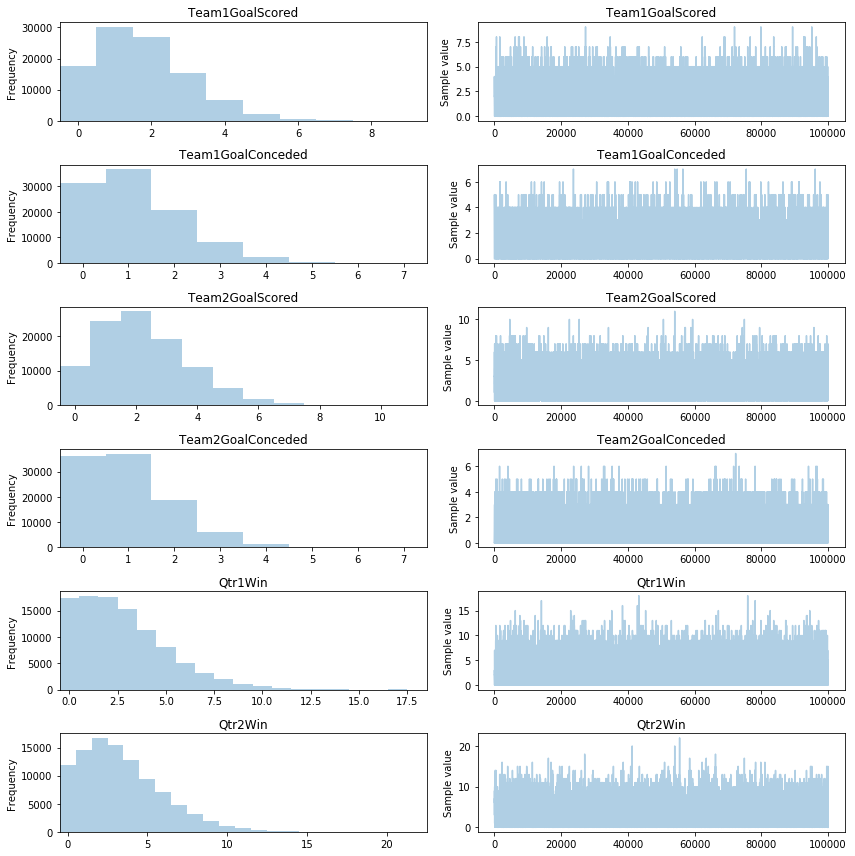

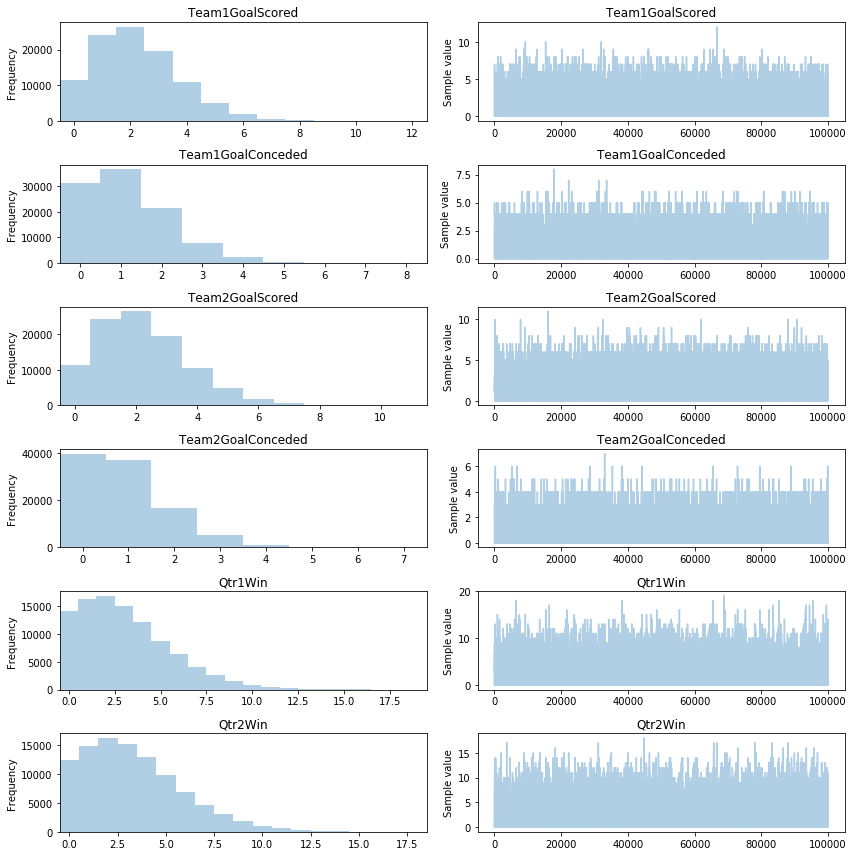

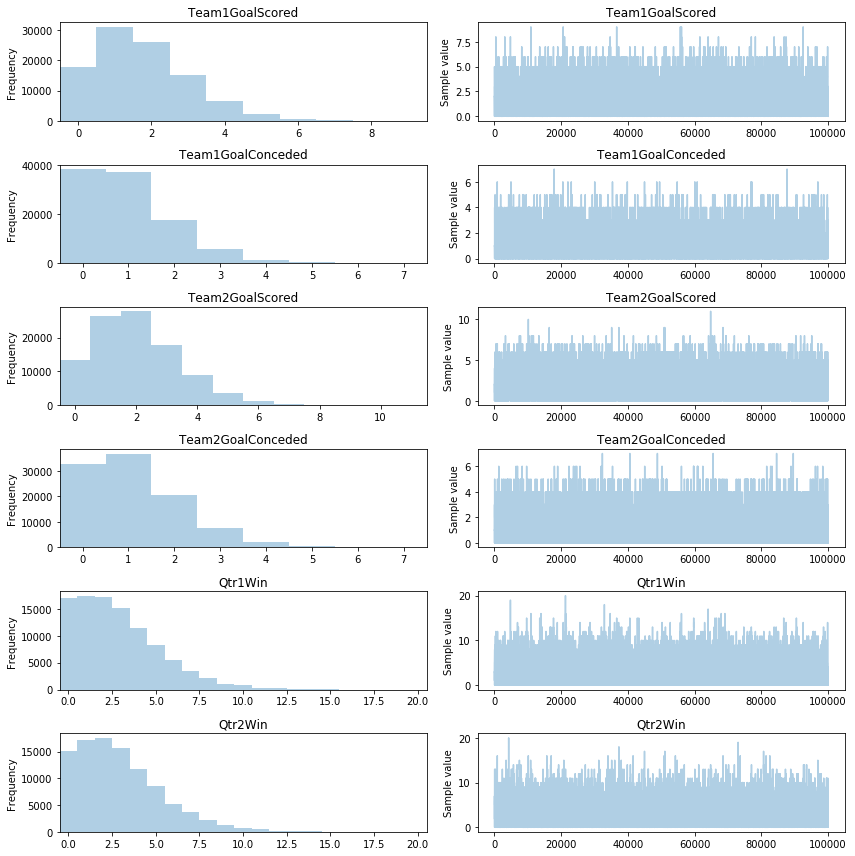

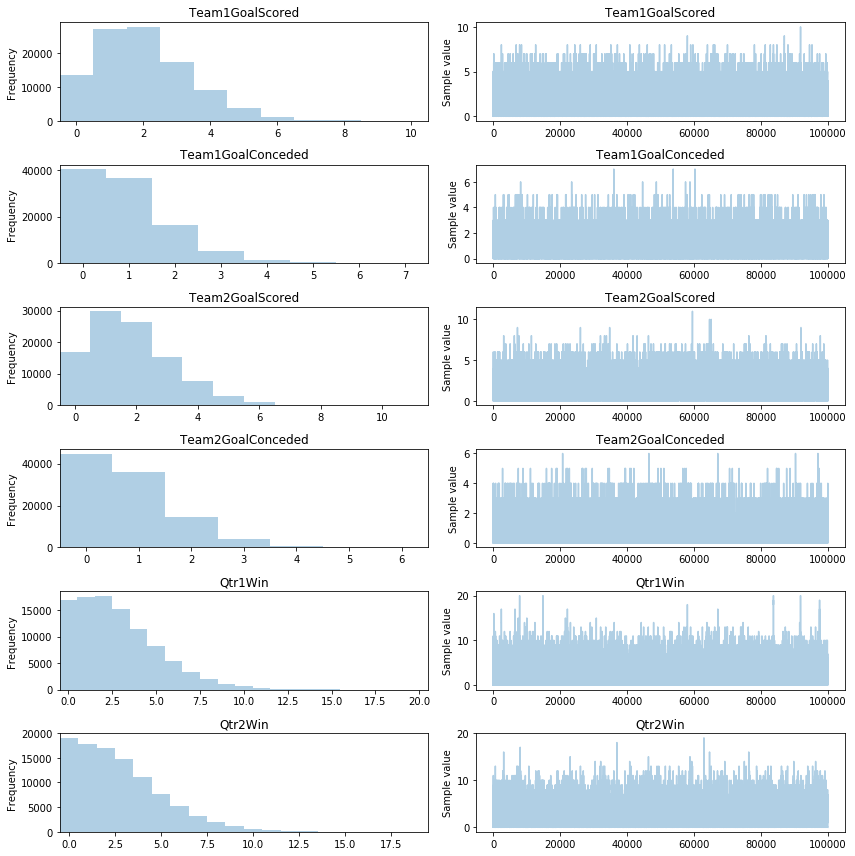

In [44]:
i=0
j=0
k=0
QtrR=pd.DataFrame(columns=['Home_Team'])
while (i<=len(QQtr)-1):
    j=i+1
    Qtr = pm.Model();    
    with Qtr:
        Team1GoalScored = pm.Poisson('Team1GoalScored',QQtr.GoalScored[i]/QQtr.No_of_matches[i])
        Team1GoalConceded = pm.Poisson('Team1GoalConceded',QQtr.GoalConceded[i]/QQtr.No_of_matches[i])
        Team2GoalScored = pm.Poisson('Team2GoalScored',QQtr.GoalScored[j]/QQtr.No_of_matches[j])
        Team2GoalConceded = pm.Poisson('Team2GoalConceded',QQtr.GoalConceded[j]/QQtr.No_of_matches[j])
        Qtr1Win = pm.Poisson('Qtr1Win',Team1GoalScored+Team2GoalConceded)
        Qtr2Win = pm.Poisson('Qtr2Win',Team2GoalScored+Team1GoalConceded)
        trace2= pm.sample(100000,tune=50000,random_seed=123,progressbar=True)     
        k+=1        
        QtrR.at[k,'Home_Team']=QQtr.Team[i]
        QtrR.at[k,'Away_Team']=QQtr.Team[j]                                  
        QtrR.at[k,'HomeWon']=trace2['Qtr1Win'].mean()
        QtrR.at[k,'AwayWon']=trace2['Qtr2Win'].mean()
        QtrR.at[k,'Goal_scored_Home']=trace2['Team1GoalScored'].mean()
        QtrR.at[k,'Goal_scored_Away']=trace2['Team2GoalScored'].mean()        
        pm.traceplot(trace2)
    i+=2

In [45]:
QtrR

,Home_Team,Away_Team,HomeWon,AwayWon,Goal_scored_Home,Goal_scored_Away
1,Japan,England,2.75936,3.37357,1.74923,2.20549
2,Germany,Brazil,3.12260,3.33215,2.21501,2.18870
3,Croatia,Australia,2.84805,2.95702,1.72655,2.01423
4,Spain,Iran,2.80980,2.71101,1.99847,1.80359


In [46]:
Semi = pd.DataFrame(columns=['Team'])
i=0
for i in range(1,len(QtrR)+1):
    if (QtrR.HomeWon[i]>QtrR.AwayWon[i]):
        Semi.at[i,'Team']=QtrR.Home_Team[i]
    else:
        Semi.at[i,'Team']=QtrR.Away_Team[i]
Semi        

,Team
1,England
2,Brazil
3,Australia
4,Spain


In [47]:
i=0
j=0
for i in range(1,len(Semi)+1):
    for j in range(0,len(df)):  
        if (Semi.Team[i]==df.Team[j]):
            Semi.at[i,'Group']=df.Group[j]
            Semi.at[i,'GoalScored']=df.goal_scored[j]
            Semi.at[i,'GoalConceded']=df.goal_conceded[j]
            Semi.at[i,'No_of_matches']=df.No_of_matches[j]

In [48]:
Semi
Semi=Semi.sort_values(['Group'],ascending=False)
Semi=Semi.reset_index(drop=True)
Semi

,Team,Group,GoalScored,GoalConceded,No_of_matches
0,England,G,2145.0,966.0,981.0
1,Brazil,E,2094.0,876.0,956.0
2,Australia,C,1011.0,564.0,503.0
3,Spain,B,1336.0,610.0,674.0


Assigned Metropolis to Team1GoalScored
Assigned Metropolis to Team1GoalConceded
Assigned Metropolis to Team2GoalScored
Assigned Metropolis to Team2GoalConceded
Assigned Metropolis to Semi1Win
Assigned Metropolis to Semi2Win
100%|█████████████████████████████████| 150000/150000 [05:07<00:00, 488.28it/s]
Assigned Metropolis to Team1GoalScored
Assigned Metropolis to Team1GoalConceded
Assigned Metropolis to Team2GoalScored
Assigned Metropolis to Team2GoalConceded
Assigned Metropolis to Semi1Win
Assigned Metropolis to Semi2Win
100%|█████████████████████████████████| 150000/150000 [05:21<00:00, 465.86it/s]


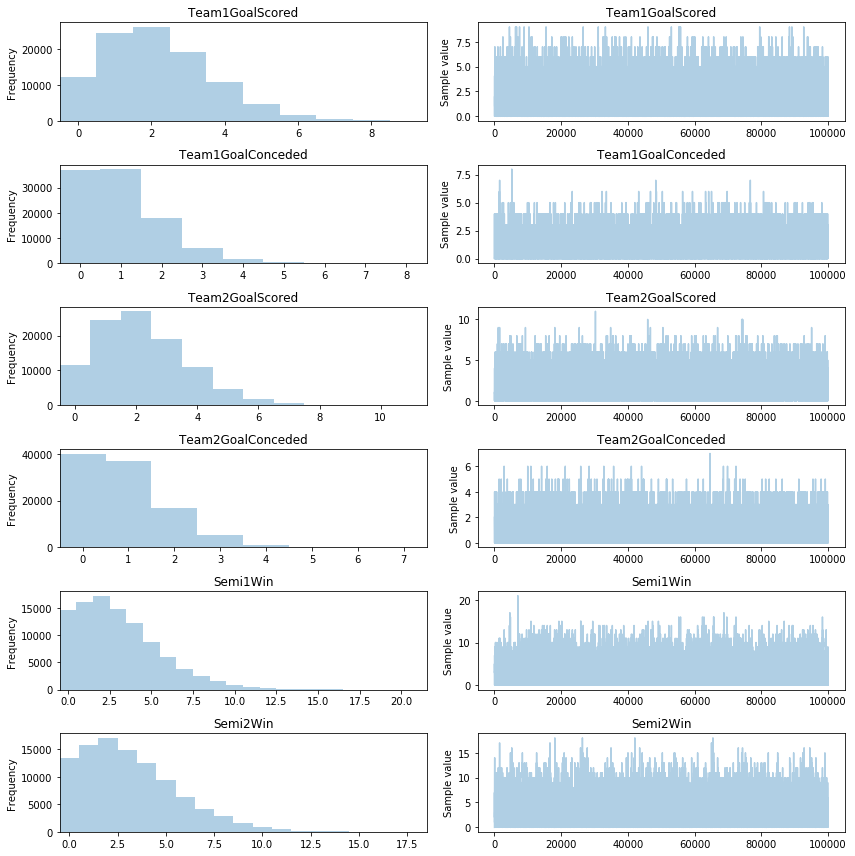

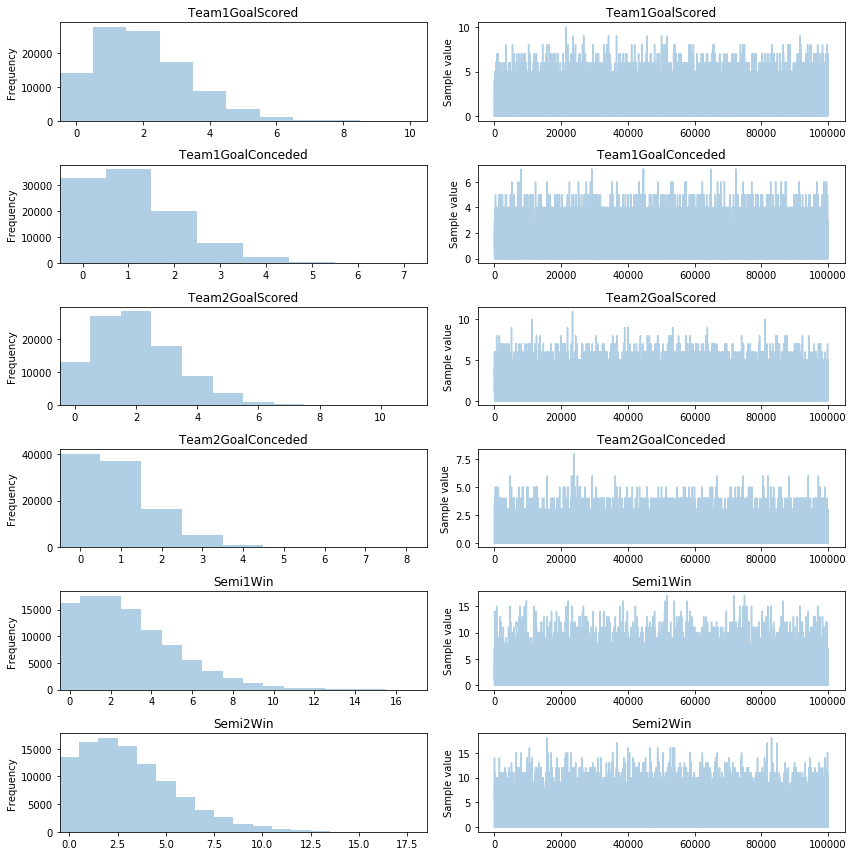

In [49]:
i=0
j=0
k=0
SemiR=pd.DataFrame(columns=['Home_Team'])
while (i<=len(Semi)-1):
    j=i+1
    Sem = pm.Model();    
    with Sem:
        Team1GoalScored = pm.Poisson('Team1GoalScored',Semi.GoalScored[i]/Semi.No_of_matches[i])
        Team1GoalConceded = pm.Poisson('Team1GoalConceded',Semi.GoalConceded[i]/Semi.No_of_matches[i])
        Team2GoalScored = pm.Poisson('Team2GoalScored',Semi.GoalScored[j]/Semi.No_of_matches[j])
        Team2GoalConceded = pm.Poisson('Team2GoalConceded',Semi.GoalConceded[j]/Semi.No_of_matches[j])
        Semi1Win = pm.Poisson('Semi1Win',Team1GoalScored+Team2GoalConceded)
        Semi2Win = pm.Poisson('Semi2Win',Team2GoalScored+Team1GoalConceded)
        trace2= pm.sample(100000,tune=50000,random_seed=123,progressbar=True)     
        k+=1        
        SemiR.at[k,'Home_Team']=Semi.Team[i]
        SemiR.at[k,'Away_Team']=Semi.Team[j]                                  
        SemiR.at[k,'HomeWon']=trace2['Semi1Win'].mean()
        SemiR.at[k,'AwayWon']=trace2['Semi2Win'].mean()
        SemiR.at[k,'Goal_scored_Home']=trace2['Team1GoalScored'].mean()
        SemiR.at[k,'Goal_scored_Away']=trace2['Team2GoalScored'].mean()        
        pm.traceplot(trace2)
    i+=2

In [50]:
SemiR

,Home_Team,Away_Team,HomeWon,AwayWon,Goal_scored_Home,Goal_scored_Away
1,England,Brazil,3.07444,3.17710,2.17185,2.18209
2,Australia,Spain,2.87734,3.13782,1.97297,2.00465


In [51]:
Final2018 = pd.DataFrame(columns=['Team'])
i=0
for i in range(1,len(SemiR)+1):
    if (SemiR.HomeWon[i]>SemiR.AwayWon[i]):
        Final2018.at[i,'Team']=SemiR.Home_Team[i]
    else:
        Final2018.at[i,'Team']=SemiR.Away_Team[i]
Final2018  

,Team
1,Brazil
2,Spain


In [52]:
i=0
j=0

for i in range(1,len(Final2018)+1):
    for j in range(0,len(df)):  
        if (Final2018.Team[i]==df.Team[j]):            
            Final2018.at[i,'GoalScored']=df.goal_scored[j]
            Final2018.at[i,'GoalConceded']=df.goal_conceded[j]
            Final2018.at[i,'No_of_matches']=df.No_of_matches[j]
Final2018            

,Team,GoalScored,GoalConceded,No_of_matches
1,Brazil,2094.0,876.0,956.0
2,Spain,1336.0,610.0,674.0


In [53]:
Final2018=Final2018.reset_index(drop=True)
Final2018

,Team,GoalScored,GoalConceded,No_of_matches
0,Brazil,2094.0,876.0,956.0
1,Spain,1336.0,610.0,674.0


Assigned Metropolis to FTeam1GoalScored
Assigned Metropolis to FTeam1GoalConceded
Assigned Metropolis to FTeam2GoalScored
Assigned Metropolis to FTeam2GoalConceded
Assigned Metropolis to Final20181Win
Assigned Metropolis to Final20182Win
100%|█████████████████████████████████| 150000/150000 [05:36<00:00, 445.95it/s]


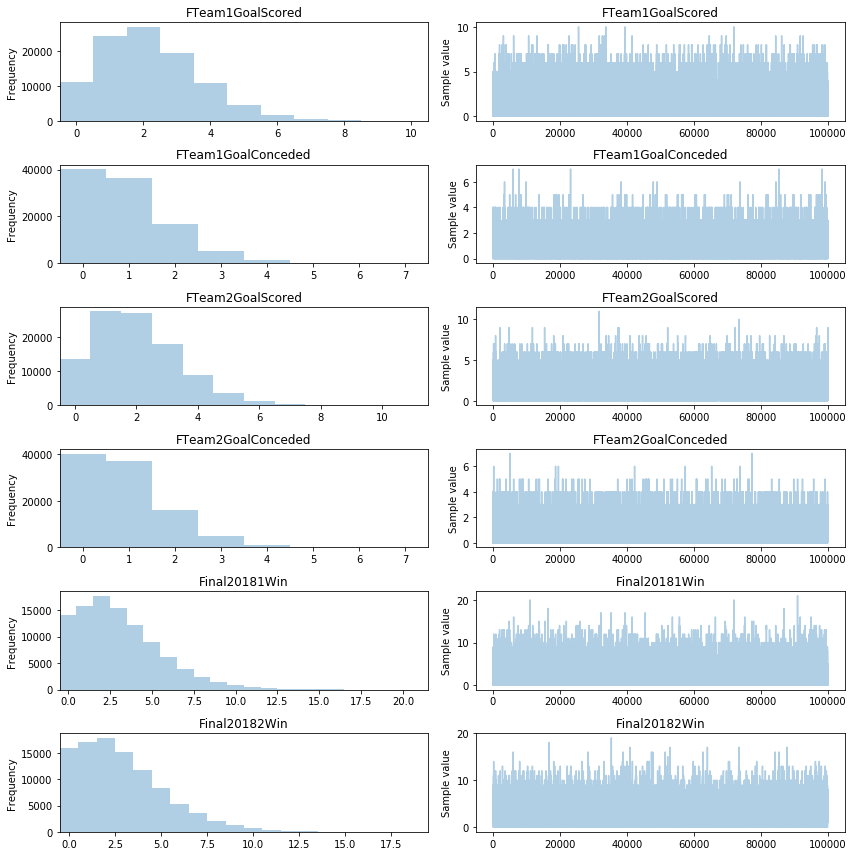

In [56]:
i=0
j=0
FifaFinal2018 = pd.DataFrame(columns=['Home_Team'])
WinnerFifa2018 = pm.Model();

j=i+1 
with WinnerFifa2018:        
    FTeam1GoalScored = pm.Poisson('FTeam1GoalScored',Final2018.GoalScored[i]/Final2018.No_of_matches[i])
    FTeam1GoalConceded = pm.Poisson('FTeam1GoalConceded',Final2018.GoalConceded[i]/Final2018.No_of_matches[i])
    FTeam2GoalScored = pm.Poisson('FTeam2GoalScored',Final2018.GoalScored[i+1]/Final2018.No_of_matches[i+1])
    FTeam2GoalConceded = pm.Poisson('FTeam2GoalConceded',Final2018.GoalConceded[i+1]/Final2018.No_of_matches[i+1])
    Final20181Win = pm.Poisson('Final20181Win',FTeam1GoalScored+FTeam2GoalConceded)
    Final20182Win = pm.Poisson('Final20182Win',FTeam2GoalScored+FTeam1GoalConceded)
    trace2= pm.sample(100000,tune=50000,random_seed=123,progressbar=True)       
    FifaFinal2018.at[i,'Home_Team']=Final2018.Team[i]
    FifaFinal2018.at[i,'Away_Team']=Final2018.Team[i+1]                                  
    FifaFinal2018.at[i,'HomeWon']=trace2['Final20181Win'].mean()
    FifaFinal2018.at[i,'AwayWon']=trace2['Final20182Win'].mean()
    FifaFinal2018.at[i,'Goal_scored_Home']=trace2['FTeam1GoalScored'].mean()
    FifaFinal2018.at[i,'Goal_scored_Away']=trace2['FTeam2GoalScored'].mean()        
    pm.traceplot(trace2)


In [57]:
FifaFinal2018

,Home_Team,Away_Team,HomeWon,AwayWon,Goal_scored_Home,Goal_scored_Away
0,Brazil,Spain,3.10384,2.889,2.1987,1.98195
